# Advanced plotting: subplots

Sometimes, we want to display plots side-by-side; either for comparison, or if they are related to one another. This can be done simply using pyplot's subplots feature

In [1]:
import numpy as np
from matplotlib import pyplot as plt

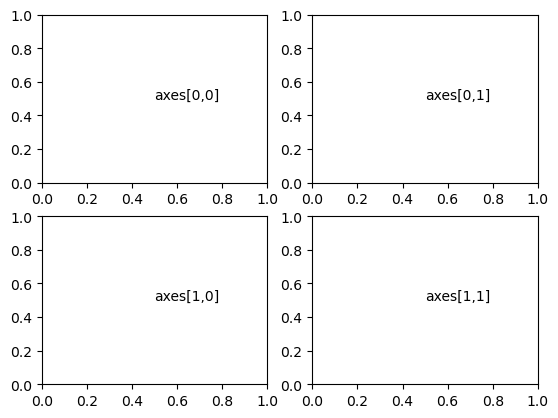

In [2]:
fig, axes = plt.subplots(2,2)

# Here we apply labels to the axes so that they are 
for i in [0,1]:
    for j in [0,1]:
        axes[i,j].text(0.5, 0.5, f"axes[{i},{j}]")

This will give you a figure - the whole thing, and an array of axes, which can be used to plot what you want

Let's make some associated plots and we can see what happens

In [3]:
x = np.random.normal(size=1000)
y = np.random.random(size=1000)

Text(0, 0.5, 'Counts')

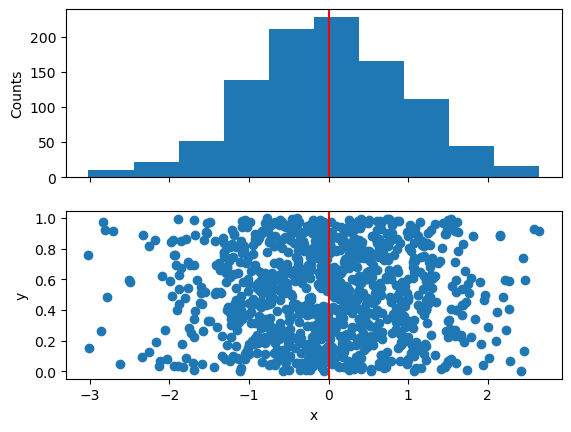

In [4]:
fig, axes = plt.subplots(2,1, sharex=True) # We can make the subplots share an x-axis, this will remove the ticks from the upper plot

axes[1].scatter(x,y)
axes[1].axvline(0, c='r')
axes[1].set_xlabel("x") # Note that the axes are set out as "row, column", and zero is at the top
axes[1].set_ylabel("y")

axes[0].hist(x)
axes[0].axvline(0, c='r')
axes[0].set_ylabel('Counts')

## Exercise

Using the `face.csv` dataset from the previous notebook, plot a figure with three subplots showing:
* The image
* The mean intensity in the x-direction of the image
* The mean intensity in the y-direction of the image

Think carefully about the placement of each of the subplots, whether any of the plots should be rotated, and if the subplots should share axes

It is possible to make subplots invisible, look in the documentation for how to do this.

Make sure you have labels where appropriate, and grids on all subplots

If you want to have no space between the subplots, you can use
`fig.subplots_adjust(wspace=0, hspace=0)`

In [5]:
face = np.genfromtxt("face.csv")

xintensity = face.mean(axis=0)
yintensity = face.mean(axis=1)

ysize, xsize = face.shape

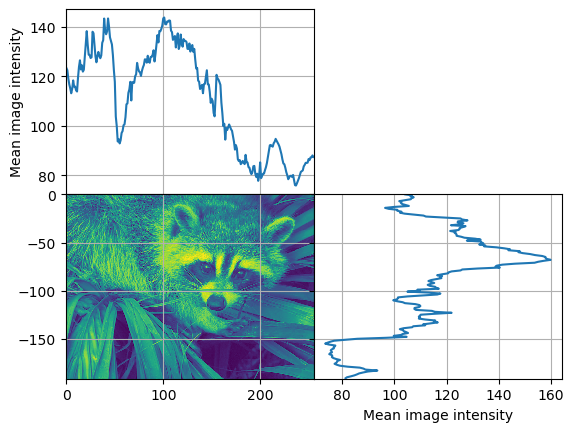

In [6]:
fig, ax, = plt.subplots(2,2, sharey='row', sharex='col')

x = np.arange(xsize, dtype=float)
y = -np.arange(ysize, dtype=float)

X, Y = np.meshgrid(x, y)

ax[1,0].pcolormesh(X, Y, face)
ax[1,0].grid()
ax[0,0].plot(x, xintensity)
ax[0,0].grid()
ax[0,0].set_ylabel("Mean image intensity")
ax[1,1].plot(yintensity, y)
ax[1,1].grid()
ax[1,1].set_xlabel("Mean image intensity")
ax[0,1].set_visible(False)

fig.subplots_adjust(wspace=0, hspace=0)